In [1]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (18, 8)

import pydicom
from glob import glob
import numpy as np
from skimage.morphology import binary_closing
import subtle.utils.io as suio
import subtle.subtle_metrics as sumetrics

def get_dicom_vol(dirpath_dicom):
    dcm_files = sorted([f for f in glob('{}/*.dcm'.format(dirpath_dicom))])
    return np.array([pydicom.dcmread(f).pixel_array for f in dcm_files])

/home/srivathsa/projects/SubtleGad/train/subtle/utils/hyperparameter.py:8: UserWarning: Module test_tube not found - hyperparameter related functions cannot be used
  warnings.warn('Module test_tube not found - hyperparameter related functions cannot be used')


<Figure size 432x288 with 0 Axes>

In [2]:
data = np.load('/home/srivathsa/projects/studies/gad/stanford/preprocess/data/Patient_0187.npy')[0]
dz, dl, df = data.transpose(1, 0, 2, 3)

# mask_full = binary_closing(df > 0.1)
# dz = dz * mask_full
# dl = dl * mask_full

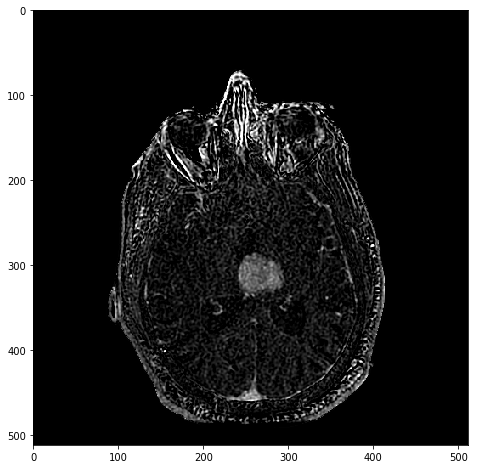

In [7]:
idx = 170
diff = dl - dz
diff = np.clip(diff, 0, diff.max())
plt.imshow(diff[idx], vmin=diff.min(), vmax=diff.max()//3)

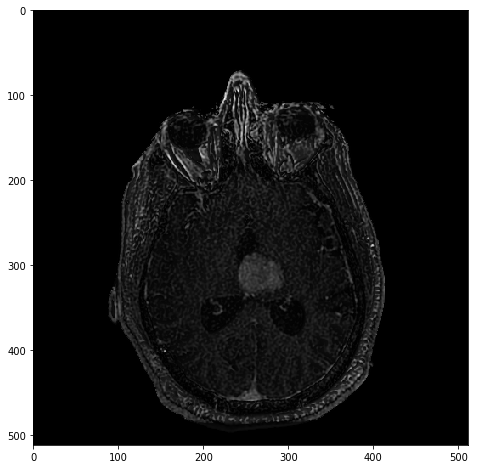

In [98]:
bst = (10 * diff)
dz_sc = np.interp(dz, (dz.min(), dz.max()), (bst.min(), bst.max()))
df_b = dz + bst
df_b = np.interp(df_b, (df_b.min(), df_b.max()), (0, 13895))

plt.imshow(df_b[idx])

In [99]:
ref_dcm = '/home/srivathsa/projects/studies/gad/stanford/data/Patient_0187/8_AX_BRAVO'
suio.write_dicoms(ref_dcm, df_b, '/home/srivathsa/projects/studies/gad/stanford/data/naive/Patient_0187', 
                  series_desc_pre='NaiveBoost:')

100%|██████████| 364/364 [00:04<00:00, 77.31it/s]


In [94]:
pred = get_dicom_vol('/home/srivathsa/projects/studies/gad/stanford/data/0bb433_3f27a5/Patient_0187/Patient_0187_SubtleGad/')
print(pred.min(), pred.max())
pred = np.interp(pred, (pred.min(), pred.max()), (df.min(), df.max()))

0 13895


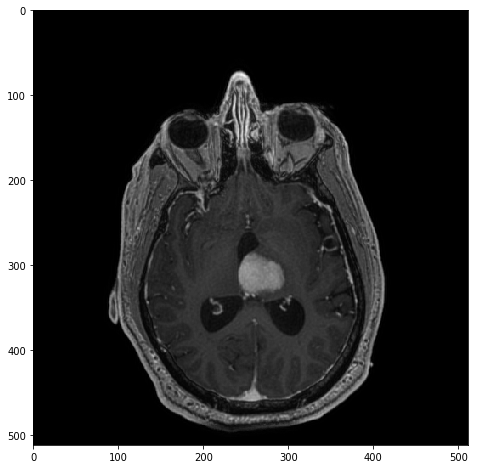

In [74]:
plt.imshow(pred[idx])

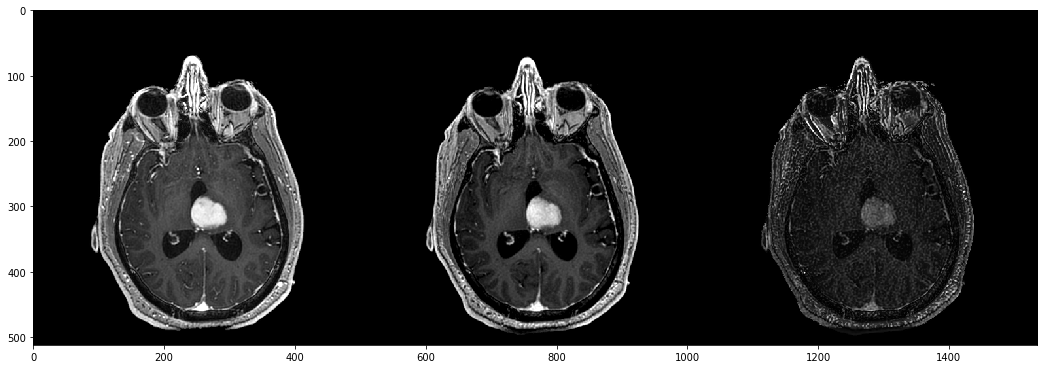

In [104]:
df = np.clip(df, 0, df.max())
pred = np.clip(pred, 0, pred.max())
df_b = np.clip(df_b, 0, df_b.max())
df_b = np.interp(df_b, (df_b.min(), df_b.max()), (df.min(), df.max()))
disp = np.hstack([df[idx], pred[idx], df_b[idx]])

plt.imshow(2*disp, vmin=disp.min(), vmax=disp.max())

In [105]:
print(sumetrics.ssim(df, pred))
print(sumetrics.ssim(df, df_b))

0.8982920038030395
0.8075000231835239


In [106]:
print(sumetrics.psnr(df, pred))
print(sumetrics.psnr(df, df_b))

30.70068852393208
24.94689296848093


In [107]:
print(sumetrics.nrmse(df, pred))
print(sumetrics.nrmse(df, df_b))

0.32826249158525517
0.6366650933935517
